The data was acquired during laboratory practice as part of 'Medical Biochemistry' course. During this class we measured levels of cortisol from patient's samples using DRG Cortisol Enzyme Immunoassay Kit. 

In [2]:
library(tidyverse)
library(car)

cort_stand_conc <- c(0, 20, 50, 100, 200, 400, 800)
cort_stand_meas <- c(0.8312, 0.6444, 0.8677, 0.4553, 0.34, 0.2347, 0.178)
(df <- data.frame(stand_conc = cort_stand_conc, absorbance = cort_stand_meas))

stand_conc,absorbance
<dbl>,<dbl>
0,0.8312
20,0.6444
50,0.8677
100,0.4553
200,0.3400
400,0.2347
800,0.1780


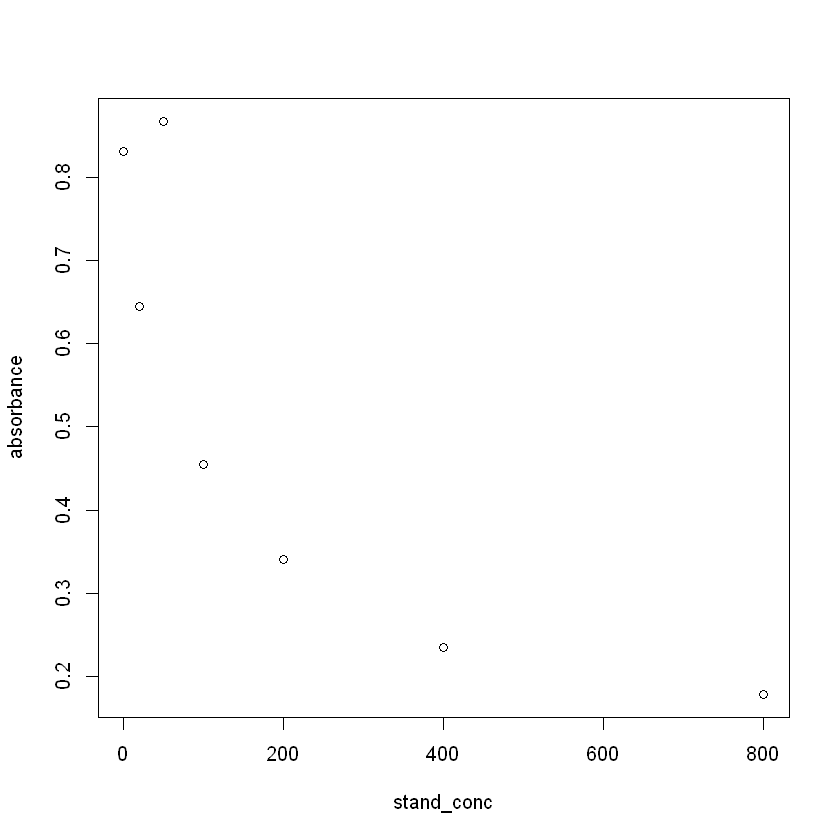

In [3]:
plot(df)

The data plot suggests that there might be logarithmic scale needed for X-axis.

In [4]:
df_log <- df[-1,]
df_log$stand_conc <- log10(df$stand_conc[-1])
rownames(df_log) <- NULL
df_log

stand_conc,absorbance
<dbl>,<dbl>
1.30103,0.6444
1.69897,0.8677
2.00000,0.4553
2.30103,0.3400
2.60206,0.2347
2.90309,0.1780


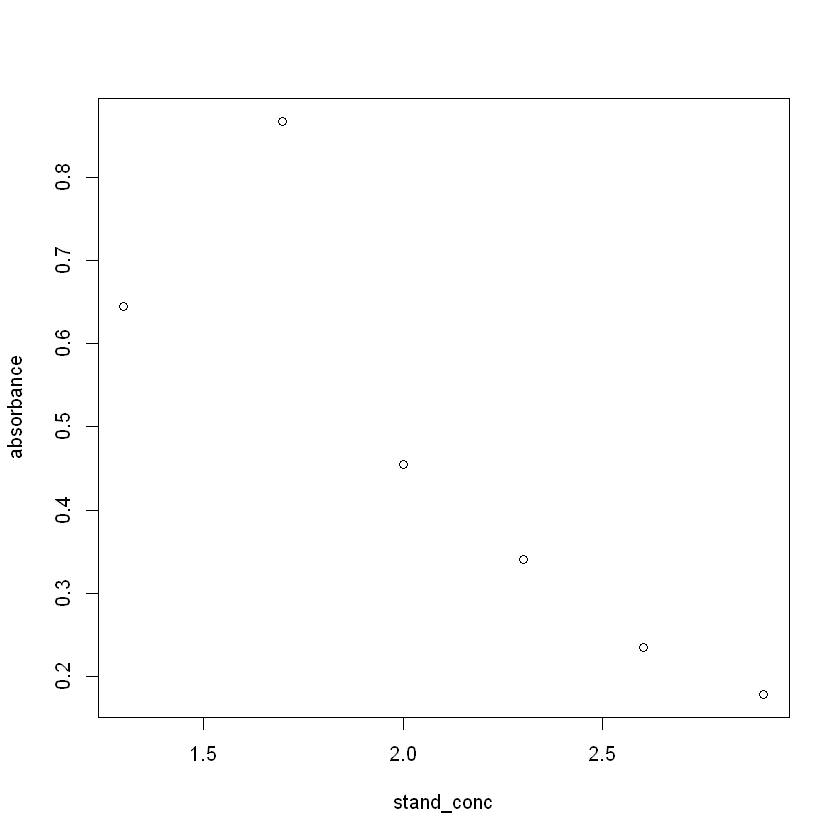

In [5]:
plot(df_log)

It looks better but it seems like the second point might be an outlier if we did linear regression. I checked it using Bonferroni outlier test

In [6]:
fit <- lm(absorbance ~ stand_conc, data = df_log)
outlierTest(fit)

  rstudent unadjusted p-value Bonferroni p
2 15.88752         0.00054218    0.0032531

The second observation has indeed high probability to be an outlier. I procedeed without using this point in linear regression and highliting it on plot as a red dot. 

[1] "-0.3017 x + 1.041 , R2 =  0.99"

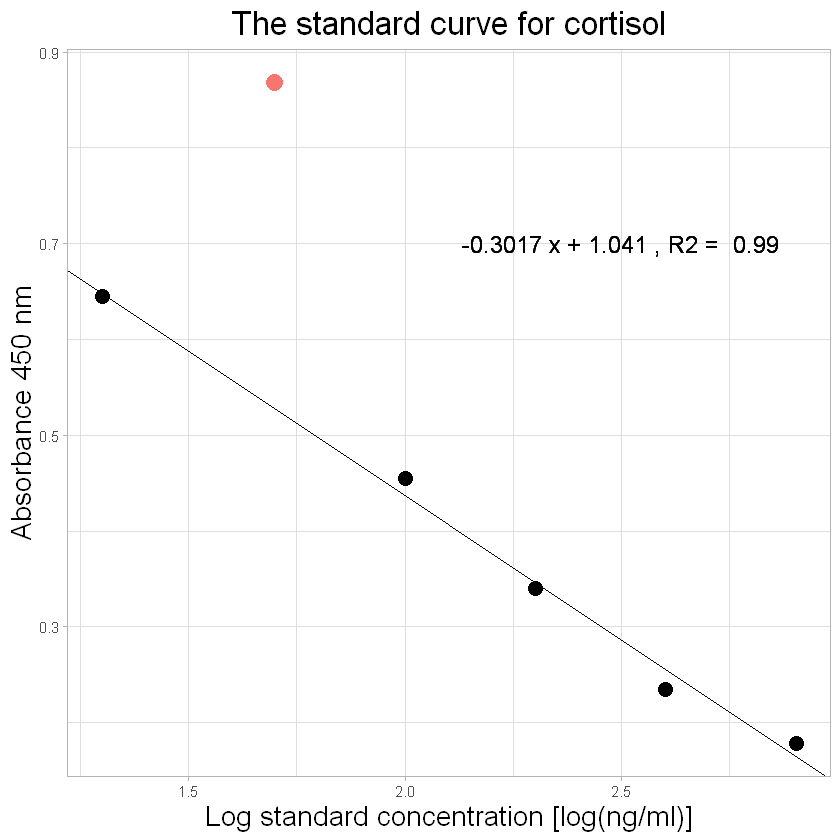

In [7]:
fit <- lm(absorbance ~ stand_conc, data = df_log, subset = (absorbance < 0.8))

fit_values <- list(a = format(unname(coef(fit)[2]), digits = 4),
    b = format(unname(coef(fit)[1]), digits = 4),
    r = format(summary(fit)$r.squared, digits = 2)
)

fit_label <- paste(fit_values$a, 'x +', fit_values$b, ', R2 = ', fit_values$r)
fit_label
ggplot(df_log, aes(stand_conc, absorbance)) +
    geom_point(size = 4) +
    geom_abline(slope = coef(fit)[["stand_conc"]], intercept = coef(fit)[["(Intercept)"]])+
    geom_text(aes(x = 2.5, y = 0.7, label = fit_label), size = 5) +
    geom_point(data = df_log[2,], aes(stand_conc, absorbance, color = "red", size = 4)) +
    xlab('Log standard concentration [log(ng/ml)]') +
    ylab('Absorbance 450 nm') +
    ggtitle('The standard curve for cortisol') +
    theme_light() +
    theme(legend.position = "none", axis.title = element_text(size=17), plot.title = element_text(hjust = 0.5, size = 20)) 


In [8]:
#absorbance of patient's sample
sample_abs <- 0.3916
sample_conc <- 10^((sample_abs - as.numeric(fit_values$b))/as.numeric(fit_values$a))
paste("Cortisol concentration in patient's sample is:", format(sample_conc, digits = 5), "ng/ml")

[1] "Cortisol concentration in patient's sample is: 142.06 ng/ml"